In [1]:
!pip install keras-tuner

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df_crypto = pd.read_csv('crypto_data.csv')
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
df_crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [10]:
df_crypto['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
is_true_df = df_crypto[df_crypto['IsTrading'] == True]
is_true_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [11]:
is_true_no_trading_info = is_true_df.drop('IsTrading', axis = 1)

In [18]:
is_true_no_na = is_true_no_trading_info.dropna()

In [19]:
has_mined = is_true_no_na[is_true_no_na['TotalCoinsMined'] > 0]

In [22]:
no_coin_name = has_mined.drop('CoinName', axis = 1)
no_coin_name

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [21]:
with_dummies = pd.get_dummies(no_coin_name)
with_dummies

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x = pd.get_dummies(no_coin_name, columns = ['Algorithm', 'ProofType'])
x

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
crypto_scaled = StandardScaler().fit_transform(with_dummies)
crypto_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, 23.04343724, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca_transformed_data = pca.fit_transform(crypto_scaled)

In [31]:
pca_transformed_data.shape

(532, 441)

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50)

In [33]:
transformed_features  = tsne.fit_transform(pca_transformed_data)
transformed_features

array([[ 1.7481214, -3.2640855],
       [ 2.1598213, -3.9449008],
       [ 1.4293658,  0.6269701],
       ...,
       [-2.1584914, -3.7625172],
       [-1.3754524, -1.4749324],
       [ 6.734571 ,  2.6489077]], dtype=float32)

In [34]:
transformed_features.shape

(532, 2)

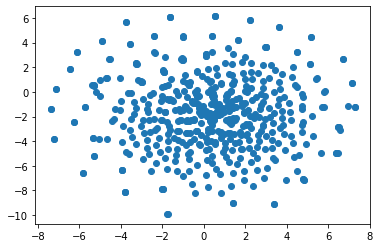

In [35]:
plt.scatter(transformed_features[:, 0], transformed_features[:,1])
plt.show()

In [36]:
from sklearn.cluster import KMeans

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}

df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

C:\Users\miss_\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,9559.358398
1,2,6424.114258
2,3,4620.017090
3,4,3656.798096
4,5,2826.441650
5,6,2341.334961
6,7,2059.022949
7,8,1821.317017
8,9,1646.107300
9,10,1470.504761


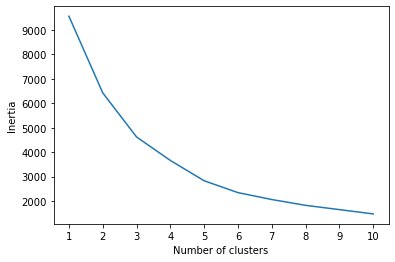

In [37]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(transformed_features)

KMeans(n_clusters=5, random_state=0)

In [39]:
predictions = model.predict(transformed_features)
predictions

array([3, 3, 0, 4, 1, 4, 1, 1, 1, 4, 3, 1, 1, 1, 4, 0, 4, 2, 3, 4, 1, 3,
       4, 2, 4, 4, 2, 1, 3, 4, 1, 0, 2, 2, 3, 1, 0, 1, 0, 1, 1, 2, 4, 4,
       0, 1, 4, 0, 0, 0, 4, 2, 1, 4, 0, 4, 0, 3, 1, 4, 4, 1, 3, 4, 4, 0,
       4, 0, 4, 3, 1, 3, 4, 4, 2, 3, 4, 0, 4, 4, 0, 2, 1, 1, 1, 0, 4, 4,
       4, 0, 4, 4, 0, 0, 4, 2, 4, 4, 1, 1, 2, 4, 0, 4, 1, 3, 4, 0, 4, 3,
       4, 2, 4, 1, 4, 3, 4, 4, 3, 3, 4, 1, 0, 0, 4, 3, 4, 3, 2, 2, 0, 3,
       3, 0, 3, 2, 4, 1, 4, 3, 4, 2, 2, 4, 0, 4, 2, 1, 3, 4, 0, 4, 4, 1,
       3, 4, 1, 2, 2, 3, 3, 1, 3, 4, 4, 4, 3, 3, 4, 0, 0, 3, 0, 1, 4, 4,
       4, 4, 2, 4, 4, 0, 1, 4, 1, 2, 4, 1, 4, 4, 4, 0, 0, 4, 3, 2, 4, 3,
       2, 2, 4, 4, 4, 3, 1, 4, 3, 4, 1, 4, 0, 0, 4, 4, 1, 1, 4, 3, 4, 2,
       0, 3, 3, 1, 4, 1, 3, 3, 4, 2, 3, 0, 4, 1, 4, 4, 0, 4, 2, 4, 2, 2,
       0, 2, 0, 4, 4, 4, 3, 2, 3, 3, 4, 3, 0, 2, 4, 4, 1, 2, 4, 3, 0, 4,
       4, 1, 2, 1, 4, 4, 1, 3, 3, 4, 0, 1, 3, 0, 3, 4, 1, 1, 4, 0, 1, 2,
       4, 0, 3, 2, 3, 0, 4, 4, 3, 0, 2, 0, 1, 4, 3,

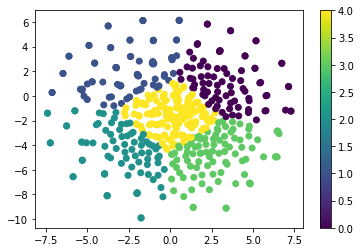

In [43]:
plt.scatter(transformed_features[:, 0], transformed_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()